# DSC 478 Assignment 4 _ Wilson Wu 

## 1. PCA for Reduced Dimensionality in Clustering [Dataset: segmentation_data.zip]

For this problem you will use an image segmentation data set for clustering. You will experiment with using PCA as an approach to reduce dimensionality and noise in the data. You will compare the results of clustering the data with and without PCA using the provided image class assignments as the ground truth. The data set is divided into three files. The file "segmentation_data.txt" contains data about images with each line corresponding to one image. Each image is represented by 19 features (these are the columns in the data and correspond to the feature names in the file "segmentation_names.txt". The file "segmentation_classes.txt" contains the class labels (the type of image) and a numeric class label for each of the corresponding images in the data file. After clustering the image data, you will use the class labels to measure completeness and homogeneity of the generated clusters. The data set used in this problem is based on the Image Segmentation data set at the UCI Machine Learning Repository.

In [1]:
import numpy as np
import pylab as pl
import pandas as pd

#### a. Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range.

#### Load in the image data matrix (with rows as images and columns as features).

In [2]:
Data = pd.read_csv("/Users/laytonwoohbill/Desktop/Depaul/2020 - winter/DSC 478 ML/week 7/segmentation_data/segmentation_data.txt",header=None)
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,32.0,158.0,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2096,8.0,162.0,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2097,128.0,161.0,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2098,150.0,158.0,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [3]:
Name = pd.read_csv("/Users/laytonwoohbill/Desktop/Depaul/2020 - winter/DSC 478 ML/week 7/segmentation_data/segmentation_names.txt",header=None)
Name.head()

,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2


In [4]:
Classes = pd.read_csv("/Users/laytonwoohbill/Desktop/Depaul/2020 - winter/DSC 478 ML/week 7/segmentation_data/segmentation_classes.txt",delimiter="\t",header=None)
Classes.head(100)

,0,1
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0
...,...,...
95,PATH,1
96,PATH,1
97,PATH,1
98,PATH,1


#### min-max normalization on the data matrix so that each feature is scaled to [0,1] range.

In [5]:
from sklearn.preprocessing import MinMaxScaler
Data_matrix = np.array(Data)
scaler = MinMaxScaler()
scaler.fit(Data_matrix)
Data_matrix_mm=scaler.transform(Data_matrix)
pd.DataFrame(Data_matrix_mm)
#Data_matrix_mm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.430830,0.741667,0.0,0.000000,0.0,0.034221,0.000672,0.027329,0.000856,0.090111,0.079417,0.061119,0.130943,0.731343,0.014118,0.872865,0.123711,0.508139,0.831849
1,0.335968,0.733333,0.0,0.000000,0.0,0.038023,0.000726,0.032298,0.000541,0.095791,0.085089,0.068483,0.134840,0.729478,0.023529,0.859583,0.127393,0.463329,0.836986
2,0.885375,0.970833,0.0,0.000000,0.0,0.115970,0.002213,0.067081,0.001097,0.085463,0.075365,0.061856,0.120031,0.736940,0.038824,0.827324,0.113402,0.480149,0.844782
3,0.181818,0.920833,0.0,0.000000,0.0,0.043726,0.001265,0.022360,0.000645,0.088562,0.080227,0.059647,0.127046,0.748134,0.014118,0.855787,0.120029,0.500966,0.825889
4,0.379447,0.729167,0.0,0.000000,0.0,0.039924,0.000697,0.026087,0.000725,0.108701,0.101297,0.078056,0.148090,0.748134,0.010588,0.861480,0.139912,0.442661,0.823924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.122530,0.612500,0.0,0.000000,0.0,0.032319,0.000870,0.018634,0.000441,0.055513,0.046191,0.078792,0.039751,0.751866,0.256471,0.461101,0.078792,0.520578,0.178177
2096,0.027668,0.629167,0.0,0.333333,0.0,0.055133,0.002080,0.007453,0.000096,0.058353,0.048622,0.079529,0.045207,0.748134,0.247059,0.480076,0.079529,0.484805,0.167750
2097,0.501976,0.625000,0.0,0.000000,0.0,0.019011,0.000254,0.017391,0.000118,0.049832,0.040519,0.072165,0.035074,0.753731,0.250588,0.468691,0.072165,0.540918,0.175915
2098,0.588933,0.612500,0.0,0.000000,0.0,0.074145,0.001647,0.031056,0.000302,0.058869,0.051053,0.081001,0.042868,0.761194,0.251765,0.459203,0.081001,0.503086,0.184789


#### b. Using the Kmeans implementation in scikit-learn, perform clustering on the image data (use K = 7 in your clustering so that later we can compare the clusters to the 7 pre-assigned image classes). Print the cluster centroids (use some formatting so that they are visually understandable). To evaluate your clusters, first perform Silhouette analysis on the clusters (compute Silhouette values for all instances in the data, and then compute the overall mean Silhouette value; optionally, you can provide a visaulization of the Silhouettes). Next, compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.

#### Kmeans

In [6]:
from sklearn.cluster import KMeans
#use K = 7 in your clustering 
kmeans = KMeans(n_clusters=7,verbose=0,max_iter=500)
kmeans.fit(Data_matrix_mm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### clusters

In [7]:
clusters = kmeans.predict(Data_matrix_mm)
pd.DataFrame(clusters, columns=["Cluster"])

,Cluster
0,3
1,3
2,3
3,3
4,3
...,...
2095,5
2096,0
2097,2
2098,2


#### cluster centroids

In [8]:
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=Name)
centroids

,"(REGION-CENTROID-COL,)","(REGION-CENTROID-ROW,)","(REGION-PIXEL-COUNT,)","(SHORT-LINE-DENSITY-5,)","(SHORT-LINE-DENSITY-2,)","(VEDGE-MEAN,)","(VEDGE-SD,)","(HEDGE-MEAN,)","(HEDGE-SD,)","(INTENSITY-MEAN,)","(RAWRED-MEAN,)","(RAWBLUE-MEAN,)","(RAWGREEN-MEAN,)","(EXRED-MEAN,)","(EXBLUE-MEAN,)","(EXGREEN-MEAN,)","(VALUE-MEAN,)","(SATURATION-MEAN,)","(HUE-MEAN,)"
0,0.251678,0.392749,0.0,0.075622,0.019403,0.077657,0.004149,0.061240,0.005037,0.147428,0.137485,0.184391,0.117637,0.718250,0.343789,0.354454,0.184648,0.413414,0.202752
1,0.535099,0.150167,0.0,0.027778,0.001667,0.030228,0.000543,0.026766,0.000587,0.823246,0.779716,0.894170,0.788761,0.270665,0.666373,0.289386,0.894170,0.211804,0.125066
2,0.769063,0.425930,0.0,0.014024,0.022654,0.039702,0.002983,0.023116,0.002094,0.040385,0.034426,0.057385,0.028059,0.779917,0.222795,0.486886,0.058362,0.539152,0.244988
3,0.513994,0.808937,0.0,0.077441,0.005051,0.054474,0.001407,0.046335,0.001401,0.108790,0.091403,0.092414,0.142676,0.679161,0.079002,0.821287,0.134901,0.414491,0.892333
4,0.302506,0.530862,0.0,0.052260,0.046610,0.100817,0.009420,0.083972,0.011043,0.400608,0.370347,0.472461,0.353036,0.497146,0.570882,0.213054,0.472461,0.302263,0.163879
5,0.253603,0.459865,0.0,0.026346,0.013746,0.037337,0.002370,0.027901,0.002022,0.025942,0.017775,0.042280,0.016464,0.769272,0.216204,0.508343,0.043251,0.802618,0.180506
6,0.748274,0.532041,0.0,0.039157,0.037651,0.113530,0.018922,0.107311,0.017627,0.298573,0.277521,0.350081,0.263837,0.593300,0.449242,0.311453,0.350163,0.303047,0.164359


#### Evaluate  clusters

In [9]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(Data[clusters == c])
    return size

size = cluster_sizes(clusters)
for i in size.keys():
    print("Size of Cluster", i, "= ", size[i])


Size of Cluster 0 =  335
Size of Cluster 1 =  300
Size of Cluster 2 =  309
Size of Cluster 3 =  297
Size of Cluster 4 =  236
Size of Cluster 5 =  291
Size of Cluster 6 =  332


#### silhouettes

In [10]:
from sklearn import metrics
silhouettes = metrics.silhouette_samples(Data_matrix_mm, clusters)
print(silhouettes.mean())

0.3320742908894385


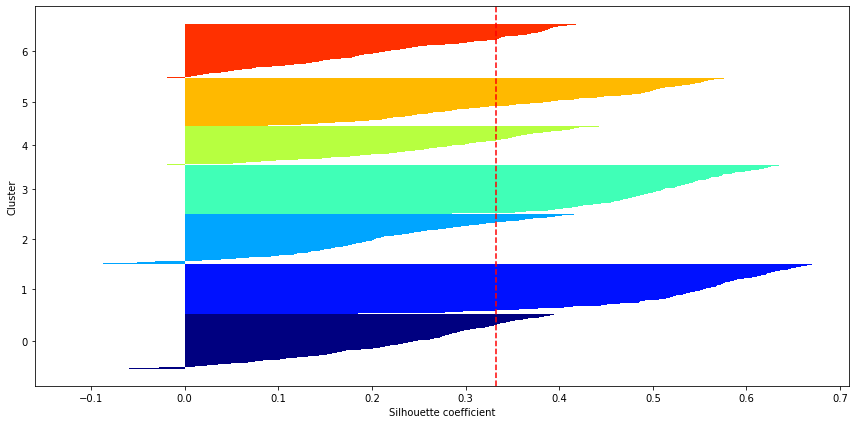

In [11]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

fig = pl.figure(figsize=(12,6))
plot_silhouettes(Data_matrix_mm, clusters)

#### Compare 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.¶

    Homogeneity: each cluster contains only members of a single class. Completeness: all members of a given class are assigned to the same cluster.

In [12]:
from sklearn.metrics import completeness_score, homogeneity_score
target=Classes.drop(columns=[0])
target=np.array((target)).reshape((2100, ))
target
print("Completeness: {}".format(completeness_score(target,clusters)))
print("Homogeneity: {}".format(homogeneity_score(target,clusters)))

Completeness: 0.6117374684331665
Homogeneity: 0.6100499914689614


#### c. Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Provide a plot of PC variances. Then use these r components as features to transform the data into a reduced dimension space.

In [13]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=19)
# n_components=19 
#[0.61 0.13 0.1  0.05 0.04 0.02 0.02 0.02 0.01 0.01 0.   0.   0.   0. 0.   0.   0.   0.   0.  ]
# so we pick n_components = 7, at least 95% 
Data_matrix_mm_trans = pca.fit_transform(Data_matrix_mm)

np.set_printoptions(precision=19,suppress=True)

print(Data_matrix_mm_trans)

#print(sum(pca.explained_variance_ratio_))

[[-0.6890821813543818     0.5329510330424801     0.24609833398091813
  ... -0.00000000311214109    0.0000000110281141734
   0.0000000000000000061]
 [-0.6669195242886993     0.5106746465469493     0.3379717161585442
  ...  0.0000000021064604863 -0.0000000098275444166
  -0.0000000000000000128]
 [-0.7120274784863162     0.770943646924276     -0.15582189032297394
  ...  0.0000000031164925196  0.0000000020870052818
   0.0000000000000002515]
 ...
 [-0.5077447486779304    -0.12941532894849098   -0.08224551228149873
  ... -0.0000000016264337177  0.0000000033848190231
   0.                   ]
 [-0.47909056909588876   -0.0863446711656336    -0.15871140738408873
  ... -0.0000000043925417326  0.000000001674995027
  -0.0000000000000000001]
 [-0.44225381592357305   -0.10622524856581878   -0.04712724642366154
  ... -0.0000000030350082151  0.0000000039853361809
   0.0000000000000000002]]


NameError: name 'pca' is not defined

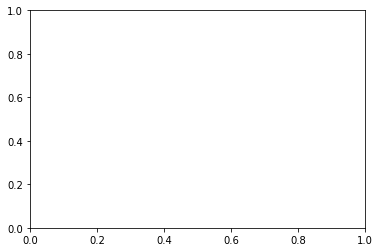

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 20), pca.explained_variance_ratio_[:19], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [65]:
# so we pick n_components = 7, at least 95% 

pca = decomposition.PCA(n_components=7)
# n_components=19 
#[0.61 0.13 0.1  0.05 0.04 0.02 0.02 0.02 0.01 0.01 0.   0.   0.   0. 0.   0.   0.   0.   0.  ]

Data_matrix_mm_trans = pca.fit_transform(Data_matrix_mm)

np.set_printoptions(precision=7,suppress=True)

print(Data_matrix_mm_trans)

#print(sum(pca.explained_variance_ratio_))

[[-0.6890822  0.532951   0.2460983 ... -0.0764329  0.0478044 -0.0473209]
 [-0.6669195  0.5106746  0.3379717 ... -0.0411777  0.0565509 -0.0417075]
 [-0.7120275  0.7709436 -0.1558219 ... -0.1666223  0.043814  -0.0606949]
 ...
 [-0.5077447 -0.1294153 -0.0822455 ... -0.0279177 -0.0318918 -0.1052502]
 [-0.4790906 -0.0863447 -0.1587114 ...  0.0044346 -0.0037129 -0.085059 ]
 [-0.4422538 -0.1062252 -0.0471272 ...  0.0152267 -0.2061659  0.1529439]]


#### d. Perform Kmeans again, but this time on the lower dimensional transformed data. Then compare Silhouette values as well as completeness and Homogeneity values of the new clusters. Compare these results with those obtained on the full data in part b.

In [16]:
#import kMeans
kmeans = KMeans(n_clusters=7,verbose=0,max_iter=100)
kmeans.fit(Data_matrix_mm_trans)

clusters_pca = kmeans.predict(Data_matrix_mm_trans)
pd.DataFrame(clusters_pca, columns=["Cluster"])

,Cluster
0,3
1,3
2,3
3,3
4,3
...,...
2095,0
2096,5
2097,4
2098,4


In [17]:
centroids_pca = pd.DataFrame(kmeans.cluster_centers_)#columns=Name)
centroids_pca

,0,1,2,3,4,5,6
0,-0.603705,-0.355503,0.109197,-0.129799,-0.130911,-0.021603,-0.043882
1,1.414527,0.087223,0.036765,-0.173195,-0.029922,-0.008973,-0.021573
2,0.436890,-0.104936,0.164951,0.234379,-0.046159,-0.007512,0.015253
3,-0.619268,0.640250,0.195829,-0.086856,-0.067760,0.008866,0.038372
4,-0.511579,-0.064908,-0.336145,-0.065365,0.078809,0.006240,-0.026261
5,-0.206229,-0.246205,0.152785,0.056522,0.130585,-0.005540,0.032849
6,0.176404,0.043698,-0.265370,0.184124,0.027075,0.024341,0.003264


In [18]:
size = cluster_sizes(clusters_pca)
for i in size.keys():
    print("Size of Cluster", i, "= ", size[i])

Size of Cluster 0 =  287
Size of Cluster 1 =  300
Size of Cluster 2 =  238
Size of Cluster 3 =  297
Size of Cluster 4 =  311
Size of Cluster 5 =  339
Size of Cluster 6 =  328


In [19]:
size = cluster_sizes(target)
for i in size.keys():
    print("Size of Cluster", i, "= ", size[i])

Size of Cluster 0 =  300
Size of Cluster 1 =  300
Size of Cluster 2 =  300
Size of Cluster 3 =  300
Size of Cluster 4 =  300
Size of Cluster 5 =  300
Size of Cluster 6 =  300


In [20]:
silhouettes = metrics.silhouette_samples(Data_matrix_mm_trans, clusters_pca)
print(silhouettes.mean())

0.3598202981349713


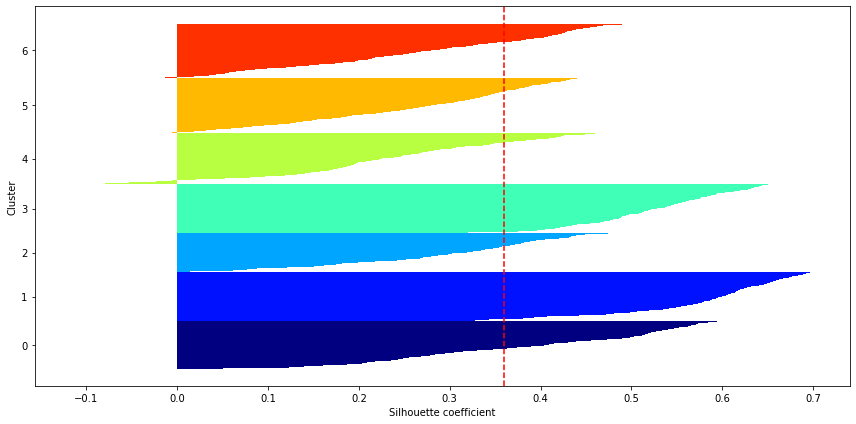

In [21]:
fig = pl.figure(figsize=(12,6))
plot_silhouettes(Data_matrix_mm_trans, clusters_pca)

In [22]:
from sklearn.metrics import completeness_score, homogeneity_score
target=Classes.drop(columns=[0])
target=np.array((target)).reshape((2100, ))
target
print("Completeness: {}".format(completeness_score(target,clusters_pca)))
print("Homogeneity: {}".format(homogeneity_score(target,clusters_pca)))

Completeness: 0.6107955063694607
Homogeneity: 0.6091364049733291


## 2. Item-Based Joke Recommendation [Dataset: jokes.zip]

For this problem you will use a modified version of the item-based recommender algorithm from Ch. 14 of Machine Learning in Action and use it on joke ratings data based on Jester Online Joke Recommender System. The modified version of the code is provided in the module itemBasedRec.py. Most of the module will be used as is, but you will add some additional functionality.

The data set contains two files. The file "modified_jester_data.csv" contains the ratings on 100 jokes by 1000 users (each row is a user profile). The ratings have been normalized to be between 1 and 21 (a 20-point scale), with 1 being the lowest rating. A zero indicated a missing rating. The file "jokes.csv" contains the joke ids mapped to the actual text of the jokes.

#### a. Load in the joke ratings data and the joke text data into appropriate data structures. Use the "recommend" function to provide top 5 joke recommendations for at least 2 users. Use both standard item-based collaborative filtering (based on the rating prediction function "standEst") and the SVD-based version of the item-based CF (using "svdEst" as the prediction engine) to generate these recommendations for the two users and note the differences. You should show the text of the recommended jokes as well as the predicted ratings for each.

In [23]:
Jokes = pd.read_csv("/Users/laytonwoohbill/Desktop/Depaul/2020 - winter/DSC 478 ML/week 7/jokes/jokes.csv",header=None)
Jokes=Jokes.drop(columns=[0])
Jokes
Jokes=np.array((Jokes)).reshape((100, ))
#Jokes=np.mat(Jokes)
#Jokes

In [24]:
Ratings  = pd.read_csv("/Users/laytonwoohbill/Desktop/Depaul/2020 - winter/DSC 478 ML/week 7/jokes/modified_jester_data.csv",header=None)
Ratings =np.mat(Ratings)
Ratings

matrix([[ 3.18, 19.79,  1.34, ...,  0.  ,  0.  ,  0.  ],
        [15.08, 10.71, 17.36, ..., 11.34,  6.68, 12.07],
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [16.58, 16.63, 15.85, ...,  0.  ,  0.  ,  0.  ],
        [ 3.67,  4.45,  3.67, ...,  3.77,  3.77,  3.28],
        [ 9.88, 11.73,  9.16, ...,  0.  ,  0.  ,  0.  ]])

In [25]:
from numpy import *
from numpy import linalg as la
import pandas as pd
import pdb
import numpy as np

def euclidSim(inA,inB):
    return 1.0/(1.0 + la.norm(inA - inB))

def pearsonSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5+0.5*corrcoef(inA, inB, rowvar = 0)[0][1]

def cosineSim(inA,inB):
    num = float(inA.T*inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5+0.5*(num/denom)

#### standard item-based collaborative filtering (based on the rating prediction function "standEst") 

In [26]:
def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0: 
            continue
        overLap = nonzero(logical_and(dataMat[:,item]>0, dataMat[:,j]>0))[0]
        if len(overLap) == 0: 
            similarity = 0
        else: 
            similarity = simMeas(dataMat[overLap,item], dataMat[overLap,j])
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal
    
def recommend(dataMat, user, N=3, simMeas=cosineSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

In [27]:
D=mat(Ratings)
U,Sigma,VT = la.svd(D)
Sigma
#Sig4 = mat(eye(4)*Sigma[:4]) #arrange Sig4 into a diagonal matrix
#xItems = data.T * U[:,:4] * Sig4.I  #create transformed items
#print(xItems)

array([3029.6815239,  871.7959338,  550.3646116,  315.4182075,
        264.8348432,  237.5464301,  226.3772334,  221.0225477,
        203.298532 ,  188.6350929,  186.472265 ,  177.7108598,
        175.7144057,  173.1317583,  171.6881781,  171.2559859,
        170.0854456,  166.434132 ,  165.7161122,  164.6652862,
        161.2164253,  160.5023819,  157.928629 ,  155.6492551,
        155.0031984,  152.816876 ,  152.0627997,  150.7801391,
        149.1115175,  147.8756609,  146.5867937,  145.1917489,
        143.417182 ,  142.1971264,  139.8701138,  139.1355782,
        138.482539 ,  138.1953122,  136.4750827,  135.7699622,
        134.7112304,  133.6109629,  132.6850403,  131.6776905,
        130.6560795,  130.3737977,  128.657395 ,  127.91998  ,
        126.8080631,  125.3596197,  124.6239084,  123.8093004,
        123.2546474,  122.3168736,  121.0450485,  120.3689749,
        119.3161811,  118.6474784,  118.1645845,  117.0731744,
        115.4623175,  114.8829694,  113.8433148,  113.4

In [28]:
user = 10
standEst_recommendations_10 = recommend(Ratings, user, N=5, simMeas=cosineSim, estMethod=standEst)
#print(standEst_recommendations_10)

print("Recommended Items for User", user, ":\n")
for i, p in standEst_recommendations_10:
    print("Item ",i, "with predicted rating: ", p, "\n")
    #print(Jokes[i], "\n")
    

Recommended Items for User 10 :

Item  71 with predicted rating:  14.804883346718462 

Item  97 with predicted rating:  14.80373948470908 

Item  79 with predicted rating:  14.802871525968017 

Item  25 with predicted rating:  14.801986760993065 

Item  82 with predicted rating:  14.80143561373277 



In [29]:
user = 900
standEst_recommendations_900 = recommend(Ratings, user, N=5, simMeas=cosineSim, estMethod=standEst)
#print(standEst_recommendations_900)

print("Recommended Items for User", user, ":\n")
for i, p in standEst_recommendations_900:
    print("Item ",i, "with predicted rating: ", p, "\n")
    #print(Jokes[i], "\n")

Recommended Items for User 900 :

Item  88 with predicted rating:  9.947493846038364 

Item  71 with predicted rating:  9.947184687143316 

Item  79 with predicted rating:  9.94199187564276 

Item  75 with predicted rating:  9.939694129066078 

Item  96 with predicted rating:  9.939673892573227 



#### SVD-based version of the item-based CF (using "svdEst" as the prediction engine) 

In [30]:
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig4 = mat(eye(4)*Sigma[:4]) #arrange Sig4 into a diagonal matrix
    xformedItems = data.T * U[:,:4] * Sig4.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T, xformedItems[j,:].T)
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal
    
def recommend(dataMat, user, N=3, simMeas=cosineSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

In [31]:
user = 10
svdEst_recommendations_10 = recommend(Ratings, user, N=5, simMeas=cosineSim, estMethod=svdEst)
#print(svdEst_recommendations_10)

print("Recommended Items for User", user, ":\n")
for i, p in svdEst_recommendations_10:
    print("Item ",i, "with predicted rating: ", p, "\n")
    #print(Jokes[i], "\n")

Recommended Items for User 10 :

Item  38 with predicted rating:  15.266649757722616 

Item  11 with predicted rating:  15.249943414997173 

Item  13 with predicted rating:  15.243929505763251 

Item  51 with predicted rating:  15.231488279411924 

Item  5 with predicted rating:  15.224822429475907 



In [32]:
user = 900
svdEst_recommendations_900 = recommend(Ratings, user, N=5, simMeas=cosineSim, estMethod=svdEst)
#print(svdEst_recommendations_900)

print("Recommended Items for User", user, ":\n")
for i, p in svdEst_recommendations_900:
    print("Item ",i, "with predicted rating: ", p, "\n")
    #print(Jokes[i], "\n")

Recommended Items for User 900 :

Item  71 with predicted rating:  10.163576566739243 

Item  79 with predicted rating:  10.07622670303836 

Item  77 with predicted rating:  10.05996086500571 

Item  76 with predicted rating:  10.032051477051612 

Item  78 with predicted rating:  10.031046829750494 



In [64]:
standEst_re_10=[i for i,p in standEst_recommendations_10]
svdEst_re_10=[i for i,p in svdEst_recommendations_10]

standEst_re_900=[i for i,p in standEst_recommendations_900]
svdEst_re_900=[i for i,p in svdEst_recommendations_900]
#standEst_recommendations_900
#svdEst_recommendations_900


print(sorted(standEst_re_10), sorted(svdEst_re_10 ))
print("\nFor user 10, two method have huge different!\n")
print(sorted(standEst_re_900), sorted(svdEst_re_900))
print("\nFor user 900, two method have 3 differents!\n")

[25, 71, 79, 82, 97] [5, 11, 13, 38, 51]

For user 10, two method have huge different!

[71, 75, 79, 88, 96] [71, 76, 77, 78, 79]

For user 900, two method have 3 differents!



#### b. Complete the definition for the function "test". This function iterates over all users and for each performs evaluation (by calling the provided "cross_validate_user" function), and returns the error information necessary to compute Mean Absolute Error (MAE). Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using the rating prediction function "standEst" with results using the "svdEst" prediction function. [Note: See comments provided in the module for hints on accomplishing these tasks.]

In [33]:
def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsonSim):
    dataMat = np.array(dataMat)
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = int(test_ratio * len(rated_items_by_user))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)

    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])
        
    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]
    # Return sum of absolute errors and the count of test cases for this user
    #Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u

def test(dataMat, test_ratio, estMethod=standEst, simMeas=pearsonSim):
    totCount = 0
    totError = 0
    M = dataMat.shape[0]
    # Write this function to iterate over all users and for each perform evaluation by calling
    for user in range(M):
        error_u, count_u=cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsonSim)
        # the above cross_validate_user function on each user. MAE will be the ratio of total error
        user_MAE=error_u/count_u
        print("Mean Absolute Error for User %d = %0.3f" %(user, user_MAE))
        totCount += count_u
        totError += error_u
    # the above cross_validate_user function on each user. MAE will be the ratio of total error
    total_MAE=totError/totCount
    print("overall Mean Absolute Error = %0.3f" %(total_MAE))
    return total_MAE


In [34]:
standEst_test=test(Ratings,0.2,standEst)

Mean Absolute Error for User 0 = 5.428
Mean Absolute Error for User 1 = 4.328
Mean Absolute Error for User 2 = 2.186
Mean Absolute Error for User 3 = 5.151
Mean Absolute Error for User 4 = 2.762
Mean Absolute Error for User 5 = 2.631
Mean Absolute Error for User 6 = 2.112
Mean Absolute Error for User 7 = 4.191
Mean Absolute Error for User 8 = 3.853
Mean Absolute Error for User 9 = 1.816
Mean Absolute Error for User 10 = 2.853
Mean Absolute Error for User 11 = 2.857
Mean Absolute Error for User 12 = 3.052
Mean Absolute Error for User 13 = 5.678
Mean Absolute Error for User 14 = 4.703
Mean Absolute Error for User 15 = 3.778
Mean Absolute Error for User 16 = 3.889
Mean Absolute Error for User 17 = 2.225
Mean Absolute Error for User 18 = 2.481
Mean Absolute Error for User 19 = 3.418
Mean Absolute Error for User 20 = 1.040
Mean Absolute Error for User 21 = 3.289
Mean Absolute Error for User 22 = 4.659
Mean Absolute Error for User 23 = 3.579
Mean Absolute Error for User 24 = 3.355
Mean Absol

Mean Absolute Error for User 204 = 4.080
Mean Absolute Error for User 205 = 5.715
Mean Absolute Error for User 206 = 5.094
Mean Absolute Error for User 207 = 1.853
Mean Absolute Error for User 208 = 3.768
Mean Absolute Error for User 209 = 1.737
Mean Absolute Error for User 210 = 4.796
Mean Absolute Error for User 211 = 5.288
Mean Absolute Error for User 212 = 4.132
Mean Absolute Error for User 213 = 2.450
Mean Absolute Error for User 214 = 2.665
Mean Absolute Error for User 215 = 2.588
Mean Absolute Error for User 216 = 3.221
Mean Absolute Error for User 217 = 4.349
Mean Absolute Error for User 218 = 4.522
Mean Absolute Error for User 219 = 3.404
Mean Absolute Error for User 220 = 3.694
Mean Absolute Error for User 221 = 1.798
Mean Absolute Error for User 222 = 3.603
Mean Absolute Error for User 223 = 0.993
Mean Absolute Error for User 224 = 2.270
Mean Absolute Error for User 225 = 6.600
Mean Absolute Error for User 226 = 3.395
Mean Absolute Error for User 227 = 3.277
Mean Absolute Er

Mean Absolute Error for User 404 = 1.168
Mean Absolute Error for User 405 = 4.505
Mean Absolute Error for User 406 = 5.853
Mean Absolute Error for User 407 = 4.265
Mean Absolute Error for User 408 = 2.960
Mean Absolute Error for User 409 = 4.385
Mean Absolute Error for User 410 = 3.872
Mean Absolute Error for User 411 = 3.439
Mean Absolute Error for User 412 = 2.095
Mean Absolute Error for User 413 = 3.429
Mean Absolute Error for User 414 = 3.188
Mean Absolute Error for User 415 = 2.595
Mean Absolute Error for User 416 = 4.794
Mean Absolute Error for User 417 = 3.487
Mean Absolute Error for User 418 = 3.429
Mean Absolute Error for User 419 = 6.450
Mean Absolute Error for User 420 = 3.089
Mean Absolute Error for User 421 = 2.105
Mean Absolute Error for User 422 = 2.527
Mean Absolute Error for User 423 = 6.978
Mean Absolute Error for User 424 = 3.171
Mean Absolute Error for User 425 = 5.321
Mean Absolute Error for User 426 = 5.156
Mean Absolute Error for User 427 = 5.978
Mean Absolute Er

Mean Absolute Error for User 604 = 5.270
Mean Absolute Error for User 605 = 3.806
Mean Absolute Error for User 606 = 1.713
Mean Absolute Error for User 607 = 3.029
Mean Absolute Error for User 608 = 1.409
Mean Absolute Error for User 609 = 1.956
Mean Absolute Error for User 610 = 1.922
Mean Absolute Error for User 611 = 0.696
Mean Absolute Error for User 612 = 3.588
Mean Absolute Error for User 613 = 5.390
Mean Absolute Error for User 614 = 2.837
Mean Absolute Error for User 615 = 2.306
Mean Absolute Error for User 616 = 4.168
Mean Absolute Error for User 617 = 2.638
Mean Absolute Error for User 618 = 2.279
Mean Absolute Error for User 619 = 2.803
Mean Absolute Error for User 620 = 1.984
Mean Absolute Error for User 621 = 3.792
Mean Absolute Error for User 622 = 3.955
Mean Absolute Error for User 623 = 4.031
Mean Absolute Error for User 624 = 2.452
Mean Absolute Error for User 625 = 4.663
Mean Absolute Error for User 626 = 4.110
Mean Absolute Error for User 627 = 1.103
Mean Absolute Er

Mean Absolute Error for User 805 = 4.240
Mean Absolute Error for User 806 = 4.534
Mean Absolute Error for User 807 = 3.638
Mean Absolute Error for User 808 = 4.046
Mean Absolute Error for User 809 = 2.222
Mean Absolute Error for User 810 = 4.709
Mean Absolute Error for User 811 = 5.011
Mean Absolute Error for User 812 = 4.132
Mean Absolute Error for User 813 = 3.917
Mean Absolute Error for User 814 = 2.325
Mean Absolute Error for User 815 = 2.764
Mean Absolute Error for User 816 = 4.273
Mean Absolute Error for User 817 = 2.666
Mean Absolute Error for User 818 = 4.226
Mean Absolute Error for User 819 = 6.504
Mean Absolute Error for User 820 = 2.612
Mean Absolute Error for User 821 = 2.705
Mean Absolute Error for User 822 = 2.917
Mean Absolute Error for User 823 = 1.459
Mean Absolute Error for User 824 = 3.017
Mean Absolute Error for User 825 = 5.816
Mean Absolute Error for User 826 = 5.002
Mean Absolute Error for User 827 = 4.094
Mean Absolute Error for User 828 = 2.058
Mean Absolute Er

In [35]:
svdEst_test=test(Ratings,0.2,svdEst)

Mean Absolute Error for User 0 = 6.048
Mean Absolute Error for User 1 = 4.067
Mean Absolute Error for User 2 = 2.034
Mean Absolute Error for User 3 = 5.024
Mean Absolute Error for User 4 = 2.886
Mean Absolute Error for User 5 = 2.516
Mean Absolute Error for User 6 = 3.782
Mean Absolute Error for User 7 = 4.502
Mean Absolute Error for User 8 = 3.490
Mean Absolute Error for User 9 = 1.436
Mean Absolute Error for User 10 = 4.122
Mean Absolute Error for User 11 = 3.496
Mean Absolute Error for User 12 = 2.229
Mean Absolute Error for User 13 = 3.894
Mean Absolute Error for User 14 = 4.935
Mean Absolute Error for User 15 = 3.370
Mean Absolute Error for User 16 = 4.820
Mean Absolute Error for User 17 = 2.736
Mean Absolute Error for User 18 = 2.099
Mean Absolute Error for User 19 = 4.761
Mean Absolute Error for User 20 = 1.710
Mean Absolute Error for User 21 = 3.335
Mean Absolute Error for User 22 = 3.477
Mean Absolute Error for User 23 = 4.113
Mean Absolute Error for User 24 = 2.199
Mean Absol

Mean Absolute Error for User 203 = 3.543
Mean Absolute Error for User 204 = 4.495
Mean Absolute Error for User 205 = 4.835
Mean Absolute Error for User 206 = 5.450
Mean Absolute Error for User 207 = 2.034
Mean Absolute Error for User 208 = 3.780
Mean Absolute Error for User 209 = 1.870
Mean Absolute Error for User 210 = 5.658
Mean Absolute Error for User 211 = 5.156
Mean Absolute Error for User 212 = 5.545
Mean Absolute Error for User 213 = 3.019
Mean Absolute Error for User 214 = 4.353
Mean Absolute Error for User 215 = 1.372
Mean Absolute Error for User 216 = 2.670
Mean Absolute Error for User 217 = 4.174
Mean Absolute Error for User 218 = 4.805
Mean Absolute Error for User 219 = 3.150
Mean Absolute Error for User 220 = 4.458
Mean Absolute Error for User 221 = 2.326
Mean Absolute Error for User 222 = 3.842
Mean Absolute Error for User 223 = 1.158
Mean Absolute Error for User 224 = 1.793
Mean Absolute Error for User 225 = 6.012
Mean Absolute Error for User 226 = 3.048
Mean Absolute Er

Mean Absolute Error for User 403 = 3.166
Mean Absolute Error for User 404 = 2.242
Mean Absolute Error for User 405 = 4.493
Mean Absolute Error for User 406 = 6.226
Mean Absolute Error for User 407 = 2.649
Mean Absolute Error for User 408 = 2.165
Mean Absolute Error for User 409 = 3.986
Mean Absolute Error for User 410 = 4.316
Mean Absolute Error for User 411 = 3.413
Mean Absolute Error for User 412 = 2.431
Mean Absolute Error for User 413 = 4.597
Mean Absolute Error for User 414 = 1.684
Mean Absolute Error for User 415 = 2.181
Mean Absolute Error for User 416 = 3.949
Mean Absolute Error for User 417 = 5.136
Mean Absolute Error for User 418 = 3.410
Mean Absolute Error for User 419 = 6.738
Mean Absolute Error for User 420 = 4.271
Mean Absolute Error for User 421 = 1.595
Mean Absolute Error for User 422 = 2.566
Mean Absolute Error for User 423 = 5.956
Mean Absolute Error for User 424 = 1.694
Mean Absolute Error for User 425 = 2.061
Mean Absolute Error for User 426 = 3.862
Mean Absolute Er

Mean Absolute Error for User 603 = 4.755
Mean Absolute Error for User 604 = 4.883
Mean Absolute Error for User 605 = 4.269
Mean Absolute Error for User 606 = 1.522
Mean Absolute Error for User 607 = 3.152
Mean Absolute Error for User 608 = 1.518
Mean Absolute Error for User 609 = 1.311
Mean Absolute Error for User 610 = 1.603
Mean Absolute Error for User 611 = 0.957
Mean Absolute Error for User 612 = 3.625
Mean Absolute Error for User 613 = 5.459
Mean Absolute Error for User 614 = 2.252
Mean Absolute Error for User 615 = 2.340
Mean Absolute Error for User 616 = 4.088
Mean Absolute Error for User 617 = 2.322
Mean Absolute Error for User 618 = 1.509
Mean Absolute Error for User 619 = 3.731
Mean Absolute Error for User 620 = 1.771
Mean Absolute Error for User 621 = 3.334
Mean Absolute Error for User 622 = 4.057
Mean Absolute Error for User 623 = 4.067
Mean Absolute Error for User 624 = 2.676
Mean Absolute Error for User 625 = 5.594
Mean Absolute Error for User 626 = 4.404
Mean Absolute Er

Mean Absolute Error for User 805 = 4.181
Mean Absolute Error for User 806 = 4.967
Mean Absolute Error for User 807 = 1.737
Mean Absolute Error for User 808 = 4.099
Mean Absolute Error for User 809 = 4.284
Mean Absolute Error for User 810 = 3.320
Mean Absolute Error for User 811 = 3.985
Mean Absolute Error for User 812 = 3.928
Mean Absolute Error for User 813 = 3.716
Mean Absolute Error for User 814 = 2.053
Mean Absolute Error for User 815 = 2.241
Mean Absolute Error for User 816 = 4.244
Mean Absolute Error for User 817 = 2.602
Mean Absolute Error for User 818 = 2.500
Mean Absolute Error for User 819 = 6.724
Mean Absolute Error for User 820 = 1.607
Mean Absolute Error for User 821 = 2.546
Mean Absolute Error for User 822 = 4.518
Mean Absolute Error for User 823 = 1.693
Mean Absolute Error for User 824 = 4.315
Mean Absolute Error for User 825 = 3.316
Mean Absolute Error for User 826 = 5.656
Mean Absolute Error for User 827 = 3.165
Mean Absolute Error for User 828 = 1.911
Mean Absolute Er

In [66]:
print("With Total standEst_test and svdEst_test \n")
print("standEst_test: {}\n".format(standEst_test))
print("svdEst_test: {}" .format(svdEst_test))
print("\nBoth are pretty close")

With Total standEst_test and svdEst_test 

standEst_test: 3.6977768983542405

svdEst_test: 3.69645668866247

Both are pretty close


#### c. Write a new function "print_most_similar_jokes" which takes the joke ratings data, a query joke id, a parameter k for the number similar jokes, and a similarity metric function, and prints the text of the query joke as well as the texts of the top k most similar jokes based on user ratings. [Note: For hints on how to accomplish this task, please see comments at the end of the provided module as well as comments for the provided stub function.] 

In [68]:
# You must compare ratings for the queryJoke (the column in dataMat corresponding to the joke), to all
    # other joke rating vectors and return the top k. Note that this is the same as performing KNN on the 
    # columns of dataMat. The function must retrieve the text of the joke from 'jokes.csv' file and print both
    # the queryJoke text as well as the text of the returned top-k jokes.
def joke_test(dataMat, queryJoke, test_ratio , simMeas=cosineSim, estMethod=standEst):
    #totCount = 0
    #totError = 0
    M = dataMat.shape[0]
    itemScores=[]
    # Write this function to iterate over all users and for each perform evaluation by calling
    for item in range(M):
        estimatedScore = estMethod(dataMat, queryJoke, simMeas, item)
        itemScores.append((item, estimatedScore))
    return itemScores
#itemScores = test(dataMat, 10, 0.2, pearsonSim, svdEst)

def load_jokes(file):
    jokes = np.genfromtxt(file, delimiter=',', dtype=str)
    jokes = np.array(jokes[:,1])
    return jokes

def get_joke_text(jokes, id):
    return np.array(jokes)[id]

# The queryJoke is a joke id as given in the 'jokes.csv' file (an corresponding to the a column in dataMat)
def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsonSim):

    # Write this function to find the k most similar jokes (based on user ratings) to a queryJoke
    itemScores=joke_test(dataMat, queryJoke, test_ratio=0.2, simMeas=cosineSim, estMethod=standEst)
    itemScores=sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:k]
    #print(itemScores)
    
    print("Recommended Jokes for queryJoke", queryJoke, ":\n")    
    #print(Jokes[i], "\n")
    
    Selected_joke=get_joke_text(jokes, queryJoke)
    print("Selected joke: \n {} \n ".format(Selected_joke))
    print("Top 5 Recommended jokes are : \n")
    for i, p in itemScores:
        Selected_joke=get_joke_text(jokes, i) 
        print(Selected_joke)  
        print('_____________________')
    return

# Examples:

dataMat = np.genfromtxt('/Users/laytonwoohbill/Desktop/Depaul/2020 - winter/DSC 478 ML/week 7/jokes/modified_jester_data.csv',delimiter=',')
dataMat = np.mat(dataMat).T
dataMat.shape

#MAE = test(dataMat[:2], 0.2, svdEst, pearsonSim)
#MAE
# MAE = test(dataMat, 0.2, standEst, pearsonSim)
#joketest(dataMat[:2],0, 0.2, estMethod=standEst, simMeas=pearsonSim)
jokes = load_jokes('/Users/laytonwoohbill/Desktop/Depaul/2020 - winter/DSC 478 ML/week 7/jokes/jokes.csv')
#get_joke_text(jokes, 1)
print_most_similar_jokes(dataMat, jokes, 3, 5, pearsonSim)

Recommended Jokes for queryJoke 3 :

Selected joke: 
 Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it. 
 
Top 5 Recommended jokes are : 

This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing. He asked her why she was leaving him and she told him that she had heard awful things about him. "What could they possibly have said to make you move out?" "They told me that you were a pedophile." He replied "That's an awfully big word for a ten year old."
_____________________
The father was very anxious to marry off his only daughter so he wanted to impress her date. "Do  you like to screw" he says. "Huh" replied the surprised first date. "My daughter she loves to screw and she's good at it you and her  should go screw" carefully explained the father. Now very interested the boy replied "Yes sir." Minutes later the girl came down the stairs kissed her father goodbye and the

#### d. [Extra Credit]: Develop you own item-based collaborative filtering recommender that uses a model-based approach (separating the training from the prediction tasks). In the training component, item-item similarities for all pairs of items are computed and stored in an appropriate data structure. Your training function should be able to use different similarity functions (passed as a parameter) including Cosine Similarity or Pearson Correlation. The prediction (or estimation) function should take as parameters a target user, an item, a value of k, and the similarities data structure and return the predicted rating on the target item for the target user. The predicted rating should be based on the weighted average of the target user's ratings on k most similar items to the target item. You should test the prediction accuracy of your estimation function (using a cross-validation similar to part b, above) and provide a plot of cross-validation accuracies across a range of values of k. Using the best value of k, demonstrate the functionality of your recommender by generating recommendations for several anecdotal users (similar to part a, above).